# Contextualização

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional, com isso, ela contratou você, para uma consultoria estratégica.

A empresa irá investir em imóveis no Condado de County, nos Estados Unidos.

Utilizando o dataset disponibilizado, você irá aplicar os conceitos de CRISP-DM aprendidos até o momento em um projeto prático, que busca desenvolver seu pensamento analítico, insights e tomada de decisões.


# King County - Condado de King - Washington
O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle.
 Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. Wikipédia
O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. 

**Dataset:** https://www.kaggle.com/harlfoxem/housesalesprediction

**Dataset detalhado:** https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/


# O Que Devo Fazer?

A empresa te contratou pois quer saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais 5 você não recomendaria o investimento de jeito nenhum.

Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema.

Também é importante ressaltar/explicar passagens complexas ou insights que você tiver durante a resolução desse projeto.


# Sobre os Dados

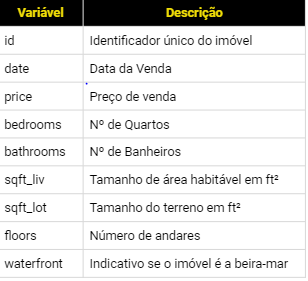   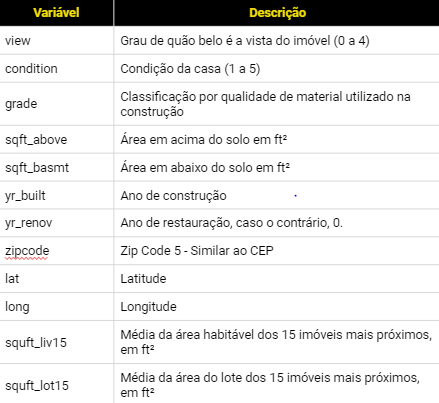

importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
!pip install geopy
from geopy.geocoders import Nominatim
! pip install uszipcode
from uszipcode import SearchEngine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


transformando e selecionando o data frame e lendo ele nas 10 primeiras colunas

In [ ]:
df_kc_house_data = pd.read_csv('/content/kc_house_data.csv', sep=',', decimal='.')
print(type(df_kc_house_data))
df_kc_house_data.sample(10)


<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20066,9276200569,20140509T000000,769900.0,4,3.50,2730,3047,2.0,0,0,...,8,2400,330,2006,0,98116,47.5797,-122.391,1980,4600
9699,1934800138,20141204T000000,390000.0,2,1.50,1050,934,2.0,0,0,...,8,960,90,2007,0,98122,47.6029,-122.309,1470,1885
11148,1122059037,20150413T000000,380000.0,3,1.75,1560,104108,1.0,0,0,...,7,1250,310,1970,0,98042,47.4016,-122.131,2000,110957
17500,8151600101,20150116T000000,115000.0,2,1.00,790,7252,1.0,0,0,...,5,790,0,1930,0,98146,47.5048,-122.365,1260,11470
21018,3023000120,20140902T000000,294900.0,3,2.50,1860,5025,2.0,0,0,...,8,1860,0,2010,0,98038,47.3557,-122.059,2000,5550
10590,4037500335,20140606T000000,455000.0,4,2.25,1740,8449,1.0,0,0,...,7,1170,570,1958,0,98008,47.6079,-122.123,1980,11175
3415,5589900590,20140505T000000,400000.0,2,1.75,2110,9519,1.0,0,0,...,7,2110,0,1948,0,98155,47.7504,-122.306,1480,9519
7591,6152900332,20140801T000000,415000.0,4,2.50,1160,16008,1.0,0,0,...,7,1160,0,1989,0,98155,47.7643,-122.295,1570,12645
599,8651100140,20140805T000000,1220000.0,4,2.25,3200,15367,2.0,0,0,...,9,3200,0,1962,0,98040,47.5494,-122.216,3070,15263
3826,3629921140,20141030T000000,856000.0,5,3.25,3620,5500,2.0,0,2,...,9,3620,0,2003,0,98029,47.5442,-121.996,3260,5500


 Convertendo o date de objeto para data;

In [ ]:
df_kc_house_data['date'] = pd.to_datetime( df_kc_house_data['date'], format='%Y-%m-%d' )
df_kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Adicionando um nova coluna para cidade;

In [ ]:
df_kc_house_data['City'] = np.nan

# Encontre a cidade de cada imóvel;

### #Preenchendo a coluna City usando o SearchEngine do uszipcode

In [ ]:
engine = SearchEngine()
for index, row in df_kc_house_data.iterrows():
  zipcode = engine.by_zipcode(df_kc_house_data['zipcode'][index])
  df_kc_house_data['City'][index] = zipcode.major_city


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Lendo o dataframe

In [ ]:
  df_kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


## #Jogando o percentual de imóveis por cidade em um gráfico. 
## #As 5 cidades com a maior quantidade de imóveis, Seattle, Renton, Bellevue, Kent, Redmond.

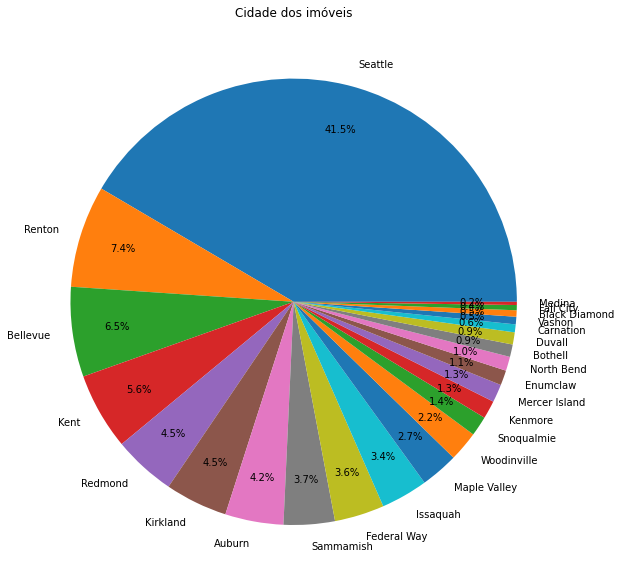

In [ ]:
tamanho_da_figura = plt.figure(figsize=(10, 15))
plt.title('Cidade dos imóveis')
plt.pie(df_kc_house_data['City'].value_counts(), labels=df_kc_house_data['City'].value_counts().index, autopct='%.1f%%', pctdistance=.8)
plt.show()

# Calcule o preço por área de imóvel;

### Criando e preenchendo a coluna preço por área habitável

In [ ]:
for index, row in df_kc_house_data.iterrows():
  df_kc_house_data['Price_squareft'] = df_kc_house_data['price']/df_kc_house_data['sqft_living']

### Conferindo maiores e menores preço/ft²

In [ ]:
df_cheapest = df_kc_house_data.sort_values(by=['Price_squareft'])

In [ ]:
df_cheapest.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
18262,2891000610,2014-12-11,148900.0,4,1.75,1700,6000,1.0,0,0,...,0,1967,0,98002,47.3252,-122.208,1280,6000,Auburn,87.588235
3785,723049156,2014-05-23,149000.0,3,1.00,1700,8645,1.0,0,0,...,0,1955,0,98146,47.4899,-122.337,1500,7980,Seattle,87.647059
13825,5637200450,2014-10-17,257000.0,5,2.75,2930,10148,2.0,0,0,...,0,2002,0,98059,47.4887,-122.145,2930,8425,Renton,87.713311
17197,5111400086,2014-05-12,110000.0,3,1.00,1250,53143,1.0,0,0,...,0,1945,0,98038,47.4235,-122.051,1820,217800,Maple Valley,88.000000
1385,3342700465,2015-01-23,250000.0,3,1.50,2840,10182,1.0,0,0,...,1330,1951,0,98056,47.5240,-122.200,2210,9669,Renton,88.028169
6523,8661000089,2014-07-16,199950.0,3,2.75,2270,13590,1.5,0,0,...,970,1948,0,98022,47.2099,-122.001,1160,13545,Enumclaw,88.083700
14993,4222310010,2014-12-26,152500.0,4,1.00,1730,7350,1.5,0,0,...,0,1970,0,98003,47.3467,-122.307,1440,7752,Federal Way,88.150289
12185,7686202065,2014-07-23,170000.0,4,1.75,1920,7500,1.0,0,0,...,0,1962,0,98198,47.4222,-122.318,1490,8000,Seattle,88.541667
8200,5379804470,2014-06-17,170000.0,4,1.00,1920,13787,1.0,0,0,...,700,1966,0,98188,47.4502,-122.277,1490,11200,Seattle,88.541667
18590,2154900040,2014-10-30,194250.0,3,2.25,2190,8834,1.0,0,0,...,800,1987,0,98001,47.2633,-122.244,1490,8766,Auburn,88.698630


In [ ]:
df_priciest = df_kc_house_data.sort_values(by=['Price_squareft'], ascending=False)

In [ ]:
df_priciest.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
19336,6021500970,2015-04-07,874950.0,2,1.00,1080,4000,1.0,0,0,...,0,1940,0,98117,47.6902,-122.387,1530,4240,Seattle,810.138889
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,0,2001,0,98075,47.5884,-122.086,3000,15959,Sammamish,800.000000
10446,1118000320,2015-05-08,3400000.0,4,4.00,4260,11765,2.0,0,0,...,980,1939,2010,98112,47.6380,-122.288,4260,10408,Seattle,798.122066
8623,6303400395,2015-01-30,325000.0,1,0.75,410,8636,1.0,0,0,...,0,1953,0,98146,47.5077,-122.357,1190,8636,Seattle,792.682927
9314,4389200610,2014-12-01,903000.0,2,1.50,1140,7800,1.0,0,0,...,0,1947,0,98004,47.6142,-122.209,2020,7800,Bellevue,792.105263
18597,3222049087,2015-04-22,570000.0,1,1.00,720,7540,1.0,1,4,...,0,1905,0,98198,47.3509,-122.323,1120,9736,Seattle,791.666667
7313,4131900066,2014-08-25,3100000.0,3,3.00,3920,13085,2.0,1,4,...,0,1996,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.816327
6243,5536100010,2015-02-04,1050000.0,4,1.00,1330,9729,1.0,0,0,...,0,1952,0,98004,47.6223,-122.208,2920,10353,Bellevue,789.473684
12757,2767603026,2015-04-15,425000.0,2,1.00,540,2500,1.0,0,0,...,0,1905,0,98107,47.6729,-122.383,1290,5000,Seattle,787.037037
18876,9808700025,2015-02-11,1500000.0,3,1.50,1910,21374,1.0,0,0,...,0,1955,0,98004,47.6453,-122.214,2850,16167,Bellevue,785.340314


# Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

### Verificando duplicados

In [ ]:
revenda = df_kc_house_data[df_kc_house_data.duplicated(['id'], keep=False)].sort_values(by='id')
revenda

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
2497,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,Auburn,125.000000
2496,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,Auburn,116.666667
16814,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,Renton,178.571429
16815,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,Renton,208.333333
11434,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0,...,0,1980,0,98023,47.2977,-122.367,1830,6956,Federal Way,168.918919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0,0,...,0,1922,0,98122,47.6147,-122.300,1440,4800,Seattle,371.428571
15200,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,Seattle,343.575419
15199,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,Seattle,195.530726
1085,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0,0,...,1040,1962,0,98144,47.5720,-122.290,1340,4080,Seattle,173.076923


In [ ]:
dups = df_kc_house_data[df_kc_house_data.id.duplicated(keep=False)]
duplicados = dups.groupby('id')['price'].apply(list)
print(duplicados.to_string()) 

id
1000102                 [280000.0, 300000.0]
7200179                 [150000.0, 175000.0]
109200390               [245000.0, 250000.0]
123039336               [148000.0, 244900.0]
251300110               [225000.0, 358000.0]
302000375               [169100.0, 250000.0]
324000530               [201500.0, 459000.0]
526059224               [260000.0, 470000.0]
641900050               [335000.0, 499950.0]
643300040               [481000.0, 719521.0]
705730280               [325000.0, 335000.0]
722039087               [220500.0, 329000.0]
723049156               [149000.0, 284700.0]
726049190               [287500.0, 431000.0]
795000620     [115000.0, 124000.0, 157000.0]
937000330               [157000.0, 246500.0]
1036400200              [661000.0, 697000.0]
1139600270              [300000.0, 310000.0]
1217000340              [185000.0, 340000.0]
1219000473              [164950.0, 371000.0]
1231000510              [263000.0, 510000.0]
1232000810              [340000.0, 537000.0]
1237500

### linha 3 tem o imóvel que foi vendido 3 vezes, destaque isso pois foi o único

In [ ]:
duplicados.to_frame(name='price') 
duplicadostabela = pd.DataFrame({'id':duplicados.index, 'price':duplicados.values})
duplicadostabela.at[14, 'price'] = [115000.0, 157000.0] 
duplicadostabela.head(16) 

,id,price
0,1000102,"[280000.0, 300000.0]"
1,7200179,"[150000.0, 175000.0]"
2,109200390,"[245000.0, 250000.0]"
3,123039336,"[148000.0, 244900.0]"
4,251300110,"[225000.0, 358000.0]"
5,302000375,"[169100.0, 250000.0]"
6,324000530,"[201500.0, 459000.0]"
7,526059224,"[260000.0, 470000.0]"
8,641900050,"[335000.0, 499950.0]"
9,643300040,"[481000.0, 719521.0]"


### fatiando a coluna preços

In [ ]:
split_price = pd.DataFrame(duplicadostabela['price'].tolist(), columns=['v1', 'v2'])

split_price

,v1,v2
0,280000.0,300000.0
1,150000.0,175000.0
2,245000.0,250000.0
3,148000.0,244900.0
4,225000.0,358000.0
...,...,...
171,195000.0,322000.0
172,1895000.0,1940000.0
173,260000.0,430000.0
174,350000.0,615000.0


### concatenando eles

In [ ]:
duplicadostabela = pd.concat([duplicadostabela, split_price], axis=1)

duplicadostabela

,id,price,v1,v2
0,1000102,"[280000.0, 300000.0]",280000.0,300000.0
1,7200179,"[150000.0, 175000.0]",150000.0,175000.0
2,109200390,"[245000.0, 250000.0]",245000.0,250000.0
3,123039336,"[148000.0, 244900.0]",148000.0,244900.0
4,251300110,"[225000.0, 358000.0]",225000.0,358000.0
...,...,...,...,...
171,9407110710,"[195000.0, 322000.0]",195000.0,322000.0
172,9809000020,"[1895000.0, 1940000.0]",1895000.0,1940000.0
173,9828200460,"[260000.0, 430000.0]",260000.0,430000.0
174,9834200305,"[350000.0, 615000.0]",350000.0,615000.0


executando o drop com os valores

In [ ]:
duplicadostabela = duplicadostabela.drop('price', axis=1)

duplicadostabela

,id,v1,v2
0,1000102,280000.0,300000.0
1,7200179,150000.0,175000.0
2,109200390,245000.0,250000.0
3,123039336,148000.0,244900.0
4,251300110,225000.0,358000.0
...,...,...,...
171,9407110710,195000.0,322000.0
172,9809000020,1895000.0,1940000.0
173,9828200460,260000.0,430000.0
174,9834200305,350000.0,615000.0


### cálculo

In [ ]:
duplicadostabela['resale'] = duplicadostabela['v2'] - duplicadostabela['v1']
duplicadostabela

,id,v1,v2,resale
0,1000102,280000.0,300000.0,20000.0
1,7200179,150000.0,175000.0,25000.0
2,109200390,245000.0,250000.0,5000.0
3,123039336,148000.0,244900.0,96900.0
4,251300110,225000.0,358000.0,133000.0
...,...,...,...,...
171,9407110710,195000.0,322000.0,127000.0
172,9809000020,1895000.0,1940000.0,45000.0
173,9828200460,260000.0,430000.0,170000.0
174,9834200305,350000.0,615000.0,265000.0


# 5 imóveis que deveria investir

In [ ]:
duplicadostabela.sort_values(by=['resale'], ascending=False)

,id,v1,v2,resale
113,6021500970,345000.0,874950.0,529950.0
147,7977201065,350000.0,740000.0,390000.0
131,7409700215,550000.0,921500.0,371500.0
100,4443800385,410000.0,778100.0,368100.0
57,2568300045,305000.0,649950.0,344950.0
...,...,...,...,...
159,8682262400,430000.0,419950.0,-10050.0
63,2767603612,500000.0,489000.0,-11000.0
88,4139420590,1212500.0,1200000.0,-12500.0
61,2726049071,510000.0,489950.0,-20050.0


# 5 que não recomendaria o investimento


In [ ]:
duplicadostabela.sort_values(by=['resale'])

,id,v1,v2,resale
127,7167000040,740000.0,700000.0,-40000.0
61,2726049071,510000.0,489950.0,-20050.0
88,4139420590,1212500.0,1200000.0,-12500.0
63,2767603612,500000.0,489000.0,-11000.0
159,8682262400,430000.0,419950.0,-10050.0
...,...,...,...,...
57,2568300045,305000.0,649950.0,344950.0
100,4443800385,410000.0,778100.0,368100.0
131,7409700215,550000.0,921500.0,371500.0
147,7977201065,350000.0,740000.0,390000.0
